In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import yfinance as yf
import datetime as dt


In [3]:
! pip install yfinance

In [3]:
commodity ='GC=F'
start=dt.datetime(2020,1,1)
end=dt.datetime(2023,1,1)
data=yf.download(commodity,start=start,end=end)


[*********************100%%**********************]  1 of 1 completed


In [4]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [5]:
prediction_days= 60
x_train =[]
y_train=[]
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data [x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [6]:
#build the model
model=Sequential()
# unit all can chg
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # prediction of the next closing value
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32) # model see 25 times 32unit once at a time




Epoch 1/25

22/22 [==============================] - 7s 44ms/step - loss: 0.0567
Epoch 2/25
22/22 [==============================] - 1s 42ms/step - loss: 0.0132
Epoch 3/25
22/22 [==============================] - 1s 46ms/step - loss: 0.0119
Epoch 4/25
22/22 [==============================] - 1s 44ms/step - loss: 0.0104
Epoch 5/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0094
Epoch 6/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0092
Epoch 7/25
22/22 [==============================] - 1s 42ms/step - loss: 0.0093
Epoch 8/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0085
Epoch 9/25
22/22 [==============================] - 1s 42ms/step - loss: 0.0092
Epoch 10/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0085
Epoch 11/25
22/22 [==============================] - 1s 44ms/step - loss: 0.0079
Epoch 12/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0072
Epoch 13/25
22/22 [===============

In [7]:
test_start=dt.datetime(2023,1,1)
test_end=dt.datetime.now()
test_data=yf.download(commodity,start=test_start,end=test_end)
actual_prices=test_data['Close'].values
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 17ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


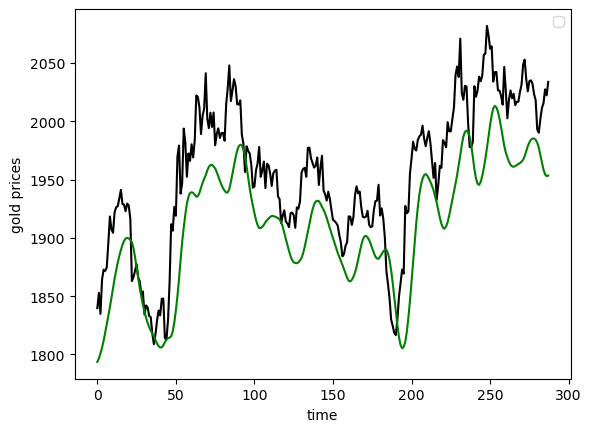

In [8]:
#make prediction on test data
x_test=[]
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)
#plot test prediction
plt.plot(actual_prices,color="black")
plt.plot(predicted_prices,color="green")
plt.xlabel('time')
plt.ylabel('gold prices')
plt.legend()
plt.show()

In [9]:
# predicting future day next day
real_data=[model_inputs[len(model_inputs) + 1- prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(scaler.inverse_transform(real_data[-1]))
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print("prediction: ",prediction)

[[2047.09997559]
 [2038.09997559]
 [2071.        ]
 [2024.09997559]
 [2018.5       ]
 [2030.5       ]
 [2029.90002441]
 [1998.30004883]
 [1978.        ]
 [1977.80004883]
 [1982.30004883]
 [2030.19995117]
 [2021.09997559]
 [2026.30004883]
 [2038.40002441]
 [2034.5       ]
 [2039.09997559]
 [2057.10009766]
 [2058.19995117]
 [2081.89990234]
 [2073.89990234]
 [2062.39990234]
 [2064.39990234]
 [2034.19995117]
 [2042.30004883]
 [2042.40002441]
 [2026.59997559]
 [2026.40002441]
 [2021.69995117]
 [2014.30004883]
 [2046.69995117]
 [2026.        ]
 [2002.59997559]
 [2018.59997559]
 [2026.5       ]
 [2019.80004883]
 [2023.69995117]
 [2013.90002441]
 [2016.90002441]
 [2016.80004883]
 [2025.19995117]
 [2031.5       ]
 [2048.39990234]
 [2053.        ]
 [2036.09997559]
 [2025.69995117]
 [2034.5       ]
 [2035.19995117]
 [2032.19995117]
 [2023.30004883]
 [2018.19995117]
 [1992.90002441]
 [1990.30004883]
 [2002.09997559]
 [2011.5       ]
 [2015.59997559]
 [2027.5       ]
 [2022.30004883]
 [2033.9000244